# Titanic Survival Prediction




![Titanic Survival Prediction](https://raw.githubusercontent.com/Masterx-AI/Project_Titanic_Survival_Prediction_/main/titanic.jpg)


In this project, the goal is to predict the survival outcome of the passengers using two different machine learning algorithms: Naive Bayes and K-Nearest Neighbors (KNN). It aims to compare the performance and accuracy of these algorithms on the Titanic dataset to understand their effectiveness in predicting survival.




# Dataset Overview
The Titanic dataset is a historical dataset containing information about the passengers aboard the RMS Titanic, which famously sank on its maiden voyage in 1912. This dataset has been widely used in machine learning and data analysis projects due to its rich set of variables and its relevance in understanding factors that influenced survival rates.

There are three datasets namely
1. train.csv
2. test.csv
3. gender_submission.csv

The dataset consists of the following columns:

1. PassengerId: A unique identifier for each passenger.
2. Survived: An indicator variable (0 or 1) representing whether the passenger survived or not. This is the target variable that we aim to predict.
3. Pclass: The passenger's ticket class (1st, 2nd, or 3rd class).
4. Name: The name of the passenger.
5. Sex: The gender of the passenger (male or female).
6. Age: The age of the passenger in years. It can be a fractional value for infants.
7. SibSp: The number of siblings/spouses aboard the Titanic.
8. Parch: The number of parents/children aboard the Titanic.
9. Ticket: The ticket number of the passenger.
10. Fare: The fare paid by the passenger for the ticket.
11. Cabin: The cabin number occupied by the passenger.
12. Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Naive Bayes is a probabilistic algorithm that assumes independence among features and calculates the probability of each class based on the training data. It is known for its simplicity and efficiency, making it a popular choice for classification tasks.  The task is to implement Naive Bayes from scratch, without using any external libraries, to predict the survival status of the Titanic passengers.

KNN, on the other hand, is a non-parametric algorithm that classifies new instances based on the majority vote of its nearest neighbors in the feature space. It does not make assumptions about the underlying data distribution, which makes it flexible and capable of handling complex decision boundaries. The task is also to implement KNN from scratch to compare its performance with Naive Bayes.

To evaluate the performance of these algorithms, the dataset is splitted into training and test sets, train the models using the training data, and then make predictions on the test data. And then the accuracy of each algorithm is measured by comparing the predicted survival outcomes with the actual survival status of the passengers. The accuracy metric will help determine which algorithm performs better in predicting survival on the Titanic dataset.

# Outline

1. Importing Libraries
2. Loading Dataset
3. Data Analysis & Visualization
4. Data Preprocessing
5. Model Building
6. Evaluation
7. Comparison

# Problem Statement

Given a dataset containing information about passengers aboard the Titanic, we aim to build machine learning models using Naive Bayes and KNN algorithms to predict the survival outcome of passengers. The models will be trained on a subset of the data and evaluated based on their accuracy. The objective is to analyze the impact of different features on survival and compare the performance of the two algorithms in terms of predictive accuracy.

# 1. Importing Libraries

Let us import the required libraries to work with our project

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading Dataset

Loading the data from the csv files named 'train.csv', 'test.csv', 'gender_submission.csv' into seperate Pandas DataFrames

In [317]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_final = pd.read_csv('gender_submission.csv')
data1_final = data_final.copy()

# 3. Data Analysis & Visualization

The dataset is analysed in order to find any errors, null values(missing values), outliers and data distribution. Additionally, during this part we can find certain relationships and patterns & trends between variables.

In [318]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [319]:
data.shape #To find the rows and columns 

(891, 12)

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [322]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset has been checked for missing values as given above, and as you can infer that the column 'Age' has missing values and 'Cabin' column has nearly most of the missing values and 'Embarked' has only 2 missing values.


Let us handle the mentioned columns and treat with the necessary steps before visualizing.

In [323]:
data = data.drop(columns = 'Cabin', axis = 1) #Since it has more missing values, it has been dropped

In [324]:
data['Age'].fillna(data['Age'].mean(), inplace = True) #The null values in the Age column is imputed with the Mean 

In [325]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True) #The null values in the Embarked column is imputed with the Mode 

Now, after cleaning some of the missing values. Let us see whether the dataset has still some missing values

In [326]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [327]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let us visualize some of the features of the dataset to see the relationships or any trends

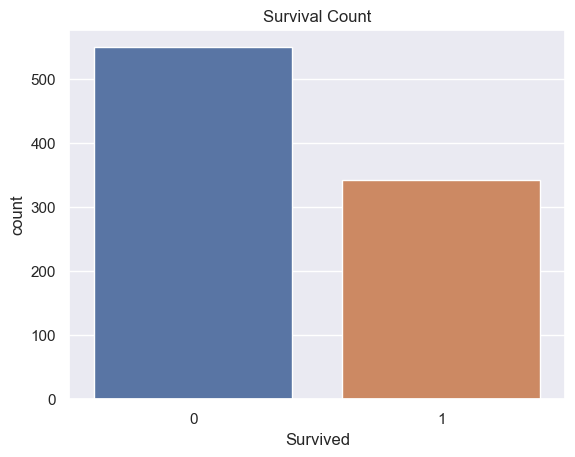

In [328]:
sns.set()
sns.countplot(x = 'Survived', data = data)
plt.title('Survival Count')
plt.show()

In [329]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

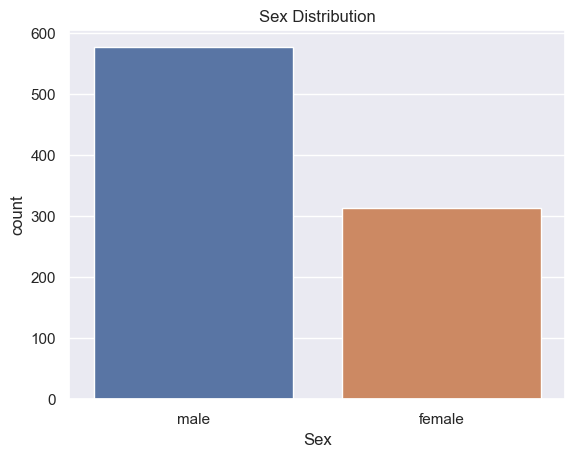

In [330]:
sns.countplot(x = 'Sex', data = data)
plt.title('Sex Distribution')
plt.show()

In [331]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Therefore, more females had survived than males during the Titanic Incident

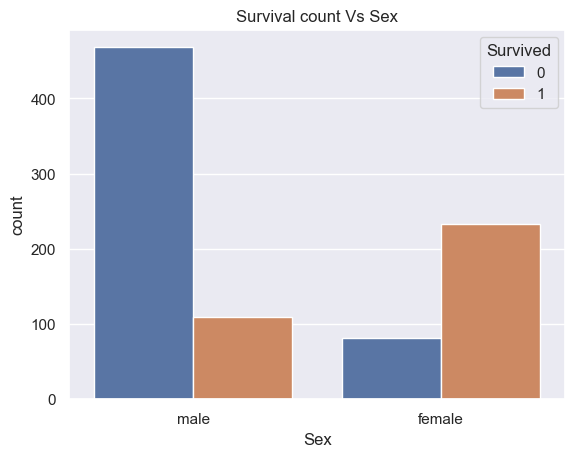

In [332]:
sns.countplot(x = 'Sex', hue = 'Survived', data = data)
plt.title('Survival count Vs Sex')
plt.show()

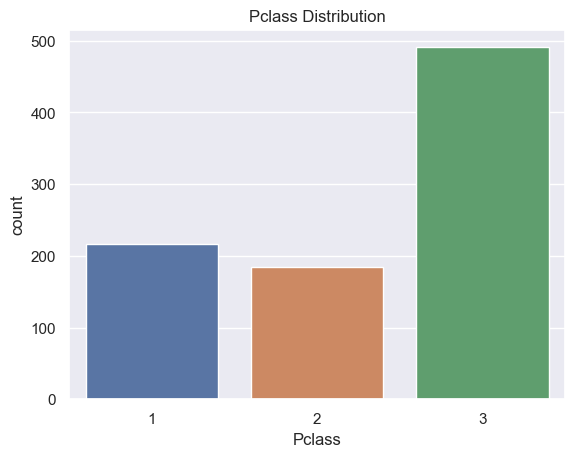

In [333]:
sns.countplot(x = 'Pclass', data = data)
plt.title('Pclass Distribution')
plt.show()

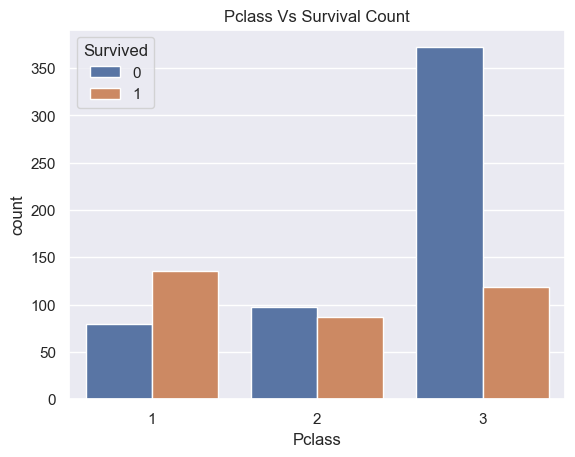

In [334]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)
plt.title('Pclass Vs Survival Count')
plt.show()

From the above plot, it is obvious that most of the passengers who have bought the third class didn't survive

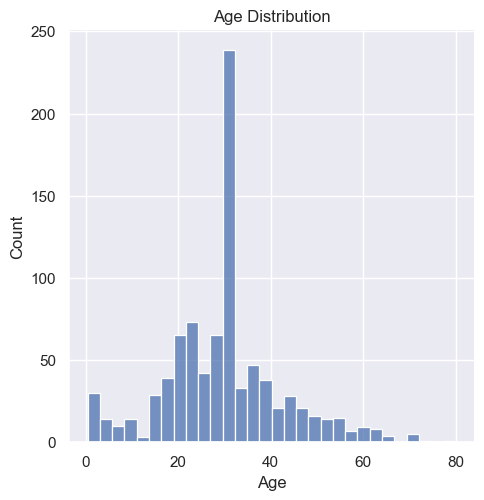

In [335]:
sns.displot(data['Age'])
plt.title('Age Distribution')
plt.show()

# 4 Data Preprocessing



The preprocessing involves dropping unnecessary columns which adds no value to our project.


Then, we're encoding some of the categorical variables. [Sex, Embarked]

In [336]:
data.drop(columns = ['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [337]:
data.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked' : {'S' : 1, 'C' : 2, 'Q' : 3}}, inplace = True)

Correlation Map - Used to represent the relationships and patterns between two variables

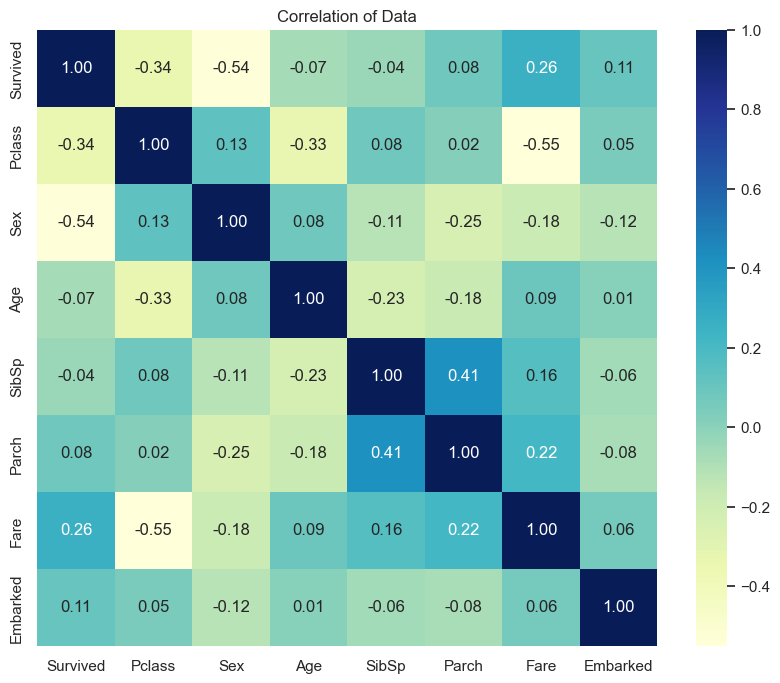

In [338]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu',fmt='.2f')
plt.title('Correlation of Data')
plt.show()

# 5. Model Building

Splitting the data into train_set and test_set. x_train is used for training the model whereas the x_test is used for evaluating the model

In [339]:
# Here, I've done the splitting of data without using Sklearn train_test_split function


X = data.drop('Survived', axis = 1)
Y = data['Survived']

# Setting the ratio for train-test split (i.e. 80% for training, 20% for testing)
train_ratio = 0.8

# Calculate the number of samples for training
num_train_samples = int(train_ratio * len(data))

# Shuffling the indices, this is to ensure that the data is randomly distributed, which results in less bias
indices = np.random.permutation(len(data))

# Splitting the data and labels based on the shuffled indices
x_train = X.iloc[indices[:num_train_samples]]
y_train = Y.iloc[indices[:num_train_samples]]
x_test = X.iloc[indices[num_train_samples:]]
y_test = Y.iloc[indices[num_train_samples:]]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


## Naive Bayes Algorithm

Naive Bayes is a probabilistic machine learning algorithm that is commonly used for classification tasks. It is based on the Bayes' theorem and assumes that features are conditionally independent given the class label.

### Formula

The Naive Bayes algorithm calculates the probability of a class label given the features using the following formula:

P(y | x1, x2, ..., xn) = (P(x1 | y) * P(x2 | y) * ... * P(xn | y) * P(y)) / P(x1, x2, ..., xn)

Where:
- P(y | x1, x2, ..., xn) is the posterior probability of class y given features x1, x2, ..., xn.
- P(x1, x2, ..., xn) is the evidence or marginal probability of features x1, x2, ..., xn.
- P(x1 | y), P(x2 | y), ..., P(xn | y) are the conditional probabilities of features x1, x2, ..., xn given class y.
- P(y) is the prior probability of class y.

### Assumptions

The Naive Bayes algorithm makes the "naive" assumption that all features are independent of each other given the class label. This simplifies the calculation of the conditional probabilities. However, this assumption may not hold true in all cases and can impact the accuracy of the algorithm.

### Classification Process

The Naive Bayes algorithm classifies a new instance by selecting the class label that has the highest posterior probability. This is done by calculating the posterior probability for each class label and comparing them.


In [340]:
#Modelling the algorithm

class_probabilities = {}
unique_classes = np.unique(y_train)
for class_value in unique_classes:
    class_probabilities[class_value] = len(y_train[y_train == class_value]) / len(y_train)

# Calculate mean and standard deviation for each feature per class

feature_stats = {}
for class_value in unique_classes: 
    feature_stats[class_value] = {}    #This is for the individual class values (i.e for class_value = 0)
    for feature in x_train.columns:    #This loop is for accessing all the features in the x_train
        feature_stats[class_value][feature] = {
            #Calculates the mean and standard deviation based on the 
            #filteration on each features according to the class_value
            
            'mean': x_train.loc[y_train == class_value, feature].mean(), 
            'std': x_train.loc[y_train == class_value, feature].std()
        }

# Function to calculate probability density function (PDF) of a given value
def calculate_pdf(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Predict the class for a given instance
def predict(instance):
    probabilities = {}
    for class_value in unique_classes:
        probabilities[class_value] = class_probabilities[class_value]
        for feature in instance.index:
            probabilities[class_value] *= calculate_pdf(instance[feature], feature_stats[class_value][feature]['mean'],
                                                       feature_stats[class_value][feature]['std'])
    return max(probabilities, key=probabilities.get)

# Make predictions on the test set
predictions = []
for _, instance in x_test.iterrows(): #Avoids the indices and only takes the values over each iteration
    predictions.append(predict(instance))

# Evaluate the model
accuracy = np.sum(predictions == y_test) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8044692737430168


Additionally, it is required to test the algorithm's accuracy using the test.csv by comparing with the gender_submission.csv

In [341]:
data_test.tail() # This is the test.csv file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Let us perform some of the data preprocessing for the test.csv which is stored in data_test DataFrame.

In [342]:
data_test.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [343]:
data_test.replace({'Sex' : {'male' : 1, 'female' : 0}, 'Embarked' : {'S' : 1, 'C' : 2, 'Q' : 3}}, inplace = True)

In [344]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


Now, the predictions for the data_test has been generated as follows

In [345]:
predictions_test = []
for _, instance in data_test.iterrows(): #Avoids the indices and only takes the values over each iteration
    predictions_test.append(predict(instance))

In [346]:
print(predictions_test)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

In [347]:
data_final.drop('PassengerId', axis = 1, inplace = True) # This is the gender_submission.csv

In [348]:
data_final = data_final.squeeze().values # To store the values in the array format.
print(data_final)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [349]:
accuracy = np.sum(predictions_test == data_final) / len(data_final)
print('Accuracy:', accuracy)

Accuracy: 0.868421052631579


Hence, the Naive Bayes Model performs well for the given test.csv file

## K-Nearest Neighbors (KNN) Algorithm

K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for both classification and regression tasks. It classifies a new data point based on its proximity to the K nearest neighbors in the training data.

### Algorithm Overview

1. Choose the value of K, the number of nearest neighbors to consider.
2. Calculate the distance between the new data point and all the training data points using a distance metric such as Euclidean distance.
3. Select the K data points with the smallest distances.
4. For classification, assign the class label that is most frequent among the K nearest neighbors. For regression, take the average of the target values of the K nearest neighbors.
5. The predicted class label or target value of the new data point is the output of the algorithm.

### Formula

KNN algorithm uses the following formula to calculate the distance between two data points:

Distance(x, xi) = sqrt((x1 - x1i)^2 + (x2 - x2i)^2 + ... + (xn - xni)^2)

Where:
- Distance(x, xi) is the distance between the new data point x and the training data point xi.
- x1, x2, ..., xn are the features of the new data point x.
- x1i, x2i, ..., xni are the features of the training data point xi.

### Choosing the Value of K

The value of K is a crucial parameter in KNN algorithm. A small value of K makes the model more sensitive to noise and outliers, while a large value of K smooths out the decision boundaries and may lead to misclassification of data points from different classes.


Let us define the model for KNN algorithm

In [357]:
# Calculate Euclidean distance between two data points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-Nearest Neighbors algorithm
def knn(x_train, y_train, x_test, k):
    y_pred = []
    for test_point in x_test.values:
        distances = []
        for train_point in x_train.values:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        sorted_indices = np.argsort(distances) # It returns the indices of the distances list after sorting it.
        k_nearest_indices = sorted_indices[:k] #The first k indices are selected to get the indices of the k nearest neighbors.
        k_nearest_labels = y_train.iloc[k_nearest_indices] #Maps the indices to the corresponding labels from the y_train
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True) #Returns the unique values and it's elements count
        predicted_label = unique_labels[np.argmax(counts)] #Selects the label with the highest count
        y_pred.append(predicted_label)
    return np.array(y_pred)

# Set the value of k (number of neighbors)
k = 3

# Make predictions using KNN algorithm
y_pred = knn(x_train, y_train, x_test, k)

# Evaluate the model
accuracy_knn = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6759776536312849


In [358]:
print(y_pred)

[0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


In [359]:
data_test.head() #test.csv file

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [353]:
data1_final.drop('PassengerId', axis = 1, inplace = True) # A copy of the data_final which is the gender_submission.csv file

In [356]:
#Splitting the test.csv and gender_submission.csv into train and test data

num_of_samples = int(0.8 * len(data_test))
indices = np.random.permutation(len(data_test))
x1_train = data_test.iloc[indices[:num_of_samples]]
x1_test = data_test.iloc[indices[num_of_samples:]]
y1_train = data1_final.iloc[indices[:num_of_samples]]
y1_test = data1_final.iloc[indices[num_of_samples:]]
print(x1_train.shape, x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(334, 7) (84, 7)
(334, 1)
(84, 1)


In [355]:
# Now predictions are made for the test data and the y_pred_test are compared with the y1_test (Which is the gender_submission.csv file)
k = 3
y_pred_test = knn(x1_train, y1_train, x1_test, k)

y1_test = y1_test.squeeze().values
accuracy_test = np.sum(y_pred_test == y1_test) / len(y1_test)
print("Accuracy:", accuracy_test)

Accuracy: 0.6071428571428571


 # 7 Comparison

The comparison between Naive Bayes algorithm and K-Nearest Neighbours algorithm accuracies has been made

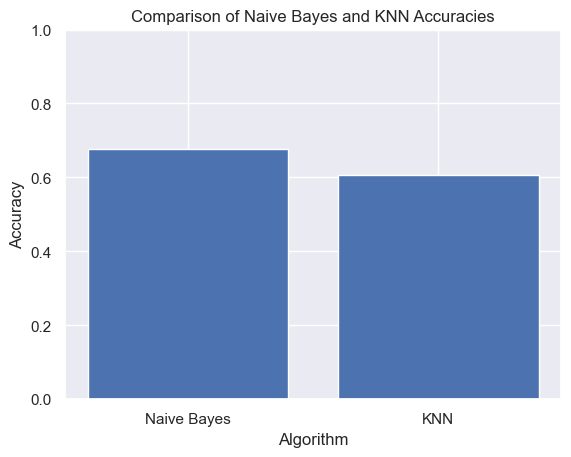

In [360]:
naive_bayes_accuracy = accuracy
knn_accuracy = accuracy_test


plt.bar(['Naive Bayes', 'KNN'], [naive_bayes_accuracy, knn_accuracy])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes and KNN Accuracies')
plt.ylim(0, 1)  # Set the y-axis limits to ensure proper visualization of accuracy values
plt.show()

From the above plot, it is obvious that Naive Bayes offers more accuracy than the K-Nearest Neighbours. 

However, the performance of Naive Bayes and KNN can vary depending on the specific characteristics of the dataset and the problem at hand. It is recommended to evaluate and compare the performance of different algorithms using appropriate evaluation metrics, such as accuracy, precision, recall, or F1 score, to determine which algorithm performs better for a given task.